# WeatherPy

#### Observations:

Max temp gets much colder starting at 40 degrees north of the equator.

Humidity is higher near the equator.

Cloudiness does not seem to be as connected with latitude.

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

#Import API Keys
from api_keys import api_key

#Import city data
from citipy import citipy

#Output file (CSV)
output_data_file = 'output_data/cities.csv'

#Latitude and Longitude Range
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#generate a list of lat/lngs and cities

lat_lng = []
cities = []

#create a list of random lat_long combinations
lats = np.random.uniform(low = -90.00, high = 90.00, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lat_lng = zip(lats, lngs)

#Get city names
for each in lat_lng:
    city = citipy.nearest_city(each[0], each[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
#print length of cities
len(cities)

611

In [78]:
url = 'http://api.openweathermap.org/data/2.5/weather?'

#create list to hold weather data
weather_data = []
num = 1
units = 'imperial'

print('Beginning Data Retrieval')
print('-' * 20)
for city in cities:
    query_url = f'{url}appid={api_key}&q={city}&units={units}'
    weather_response = requests.get(query_url).json()
    try:
        city_name = weather_response['name']
        country = weather_response['sys']['country']
        lat = weather_response['coord']['lat']
        lng = weather_response['coord']['lon']
        temp =  weather_response['main']['temp_max']
        humidity = weather_response['main']['humidity']
        clouds = weather_response['clouds']['all']
        wind_speed = weather_response['wind']['speed']
        date = weather_response['dt'] 
        city_data = {'City': city_name, 'Country': country, 'Lat': lat
                       , 'Lng': lng, 'Max Temp (F)': temp, 'Cloudiness': clouds
                       , 'Date': date, 'Humidity': humidity, 'Wind Speed': wind_speed}
        weather_data.append(city_data)        
        print(f'Processing Record {num} of Set 1 | {city_name}')
        num += 1
    except(KeyError):
        print('City Not Found. Skipping')

Beginning Data Retrieval
--------------------
Processing Record 1 of Set 1 | Tabuk
Processing Record 2 of Set 1 | Mahebourg
Processing Record 3 of Set 1 | Souillac
Processing Record 4 of Set 1 | Leh
Processing Record 5 of Set 1 | Carnarvon
Processing Record 6 of Set 1 | Poum
Processing Record 7 of Set 1 | Vedeno
Processing Record 8 of Set 1 | Aripuana
Processing Record 9 of Set 1 | Hermanus
Processing Record 10 of Set 1 | Mataura
Processing Record 11 of Set 1 | Hobart
Processing Record 12 of Set 1 | Novyye Lyady
Processing Record 13 of Set 1 | Rikitea
Processing Record 14 of Set 1 | Hay River
Processing Record 15 of Set 1 | Buchanan
Processing Record 16 of Set 1 | Punta Arenas
Processing Record 17 of Set 1 | Tautira
Processing Record 18 of Set 1 | Volzhskiy
Processing Record 19 of Set 1 | Faanui
Processing Record 20 of Set 1 | Albertville
Processing Record 21 of Set 1 | Intipuca
City Not Found. Skipping
Processing Record 22 of Set 1 | Sakaiminato
Processing Record 23 of Set 1 | Hamilto

Processing Record 185 of Set 1 | Namibe
Processing Record 186 of Set 1 | Chapais
City Not Found. Skipping
Processing Record 187 of Set 1 | Kaduqli
Processing Record 188 of Set 1 | San Andres
Processing Record 189 of Set 1 | Chabarovice
City Not Found. Skipping
Processing Record 190 of Set 1 | Sabzevar
Processing Record 191 of Set 1 | Matamoros
Processing Record 192 of Set 1 | Miraflores
Processing Record 193 of Set 1 | Fasa
Processing Record 194 of Set 1 | Tura
Processing Record 195 of Set 1 | Saint-Louis
Processing Record 196 of Set 1 | Mount Gambier
City Not Found. Skipping
Processing Record 197 of Set 1 | Natal
Processing Record 198 of Set 1 | Bereda
Processing Record 199 of Set 1 | Brae
City Not Found. Skipping
Processing Record 200 of Set 1 | Clyde River
Processing Record 201 of Set 1 | Mount Isa
Processing Record 202 of Set 1 | Cherskiy
Processing Record 203 of Set 1 | Piranshahr
Processing Record 204 of Set 1 | Pedernales
Processing Record 205 of Set 1 | Rosarito
Processing Reco

Processing Record 368 of Set 1 | Tallahassee
Processing Record 369 of Set 1 | Oxelosund
Processing Record 370 of Set 1 | Gavle
Processing Record 371 of Set 1 | Sobolevo
Processing Record 372 of Set 1 | Atambua
Processing Record 373 of Set 1 | Sao Joao da Barra
Processing Record 374 of Set 1 | Torrington
Processing Record 375 of Set 1 | Olinda
City Not Found. Skipping
Processing Record 376 of Set 1 | Byron Bay
Processing Record 377 of Set 1 | Hualmay
Processing Record 378 of Set 1 | Changji
Processing Record 379 of Set 1 | Upernavik
Processing Record 380 of Set 1 | Honningsvag
Processing Record 381 of Set 1 | Coihaique
Processing Record 382 of Set 1 | Sorland
Processing Record 383 of Set 1 | Hinova
City Not Found. Skipping
Processing Record 384 of Set 1 | Tavda
Processing Record 385 of Set 1 | Gat
Processing Record 386 of Set 1 | Abalak
Processing Record 387 of Set 1 | Guaruja
Processing Record 388 of Set 1 | Ostrovnoy
Processing Record 389 of Set 1 | Darhan
Processing Record 390 of Set

In [80]:
weather_df = pd.DataFrame(weather_data)

In [81]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp (F),Wind Speed
0,Tabuk,8,PH,1553824351,50,17.41,121.44,84.81,2.04
1,Mahebourg,40,MU,1553824145,94,-20.41,57.70,78.80,11.41
2,Souillac,0,FR,1553824015,70,45.60,-0.60,46.40,6.93
3,Leh,56,IN,1553824067,86,34.16,77.58,6.24,0.36
4,Carnarvon,0,ZA,1553824351,55,-30.97,22.13,49.98,3.94
5,Poum,0,MK,1553824352,59,41.28,20.71,27.75,2.15
6,Vedeno,0,RU,1553821200,86,42.97,46.10,37.40,4.47
7,Aripuana,56,BR,1553824352,96,-9.17,-60.63,74.01,2.37
8,Hermanus,68,ZA,1553823987,97,-34.42,19.24,64.99,2.37
9,Mataura,0,NZ,1553823605,71,-46.19,168.86,64.00,4.83


In [82]:
weather_df.to_csv(r'./weather_data.csv', index = False)

### Latitude vs Temp/Humidity/Cloudiness Plots

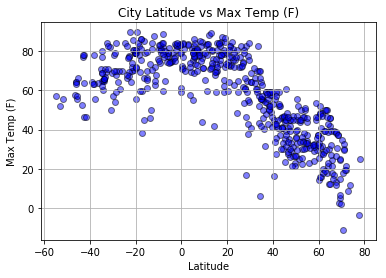

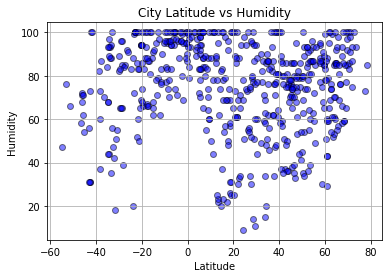

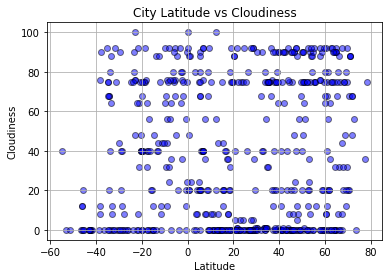

In [83]:
plots = ['Max Temp (F)', 'Humidity', 'Cloudiness']

for plot in plots:
    plt.figure()
    plt.scatter(weather_df['Lat']
                , weather_df[plot]
                , facecolors = 'blue'
                , edgecolors = 'black'
                , alpha = 0.5)

    plt.title(f'City Latitude vs {plot}')
    plt.xlabel('Latitude')
    plt.ylabel(f'{plot}')
    plt.grid()
    
    plt.show
    plt.savefig(f'./lat_vs_{plot}.png')